## Predicting Credit card applications - Approved and Un-approved
* In the banking sector, distinct criteria are established for evaluating credit card approval. For a prospective new customer seeking a credit card, it becomes crucial for the company to comprehend the factors influencing the approval or disapproval of the card. The application of machine learning in predicting credit card approvals emerges as a valuable tool. With the development of an effective model, the company gains the capability to forecast card approval for new customers based on incoming data.

* We will use the Credit Card Approval dataset from the UCI Machine Learning Repository. The dataset have been anonymized to protect the privacy but [this blog] (https://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html) gives us a pretty good overview of the probable features. The features are Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income, and ApprovalStatus respectively. The data is solely for machine learning purpose. Hence, exploration will be skilled

### Data Cleaning & Pre-Processing

In [1]:
# Importing Dependencies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
cc_app = pd.read_csv('https://raw.githubusercontent.com/ShantanilBagchi/DataCamp/master/Projects/Predicting%20Credit%20Card%20Approvals/datasets/cc_approvals.data', header = None)

In [3]:
# Inspect data
cc_app.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
# Inspect missing values in the dataset
cc_app.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [5]:
# Inspect for duplication
cc_app.duplicated().sum()

0

In [6]:
# Summary statistics
cc_app.describe()

,2,7,10,14
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [7]:
# View DataFrame information
cc_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [8]:
# Renaming the features to their actual names
cc_app.set_axis( ['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 
                  'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode',
                  'Income', 'ApprovalStatus'], axis = 1, inplace = True)
cc_app.head(3)

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.00,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.50,u,g,q,h,1.50,t,f,0,f,g,00280,824,+


In [9]:
# Features like DriversLicense and ZipCode are not required for predicting credit card approvals
cc_app = cc_app.drop(columns = ['DriversLicense','ZipCode'])
cc_app.sample()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income,ApprovalStatus
404,b,34.00,5.085,y,p,i,bb,1.085,f,f,0,g,0,-


In [10]:
# Replacing all the question marks with NaNs
cc_app = cc_app.replace('?', np.nan)

In [11]:
# Filling up numerical columns
cc_app.fillna(cc_app.mean())
cc_app.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
Citizen            0
Income             0
ApprovalStatus     0
dtype: int64

In [12]:
# Filling up the categorical column

# Iterate over each column of cc_apps_train
for col in cc_app :
    
    # Check if the column is of object type
    if cc_app[col].dtype == 'object':
        
        # Impute with the most frequent value
        cc_app = cc_app.fillna(cc_app[col].value_counts().index[0])

cc_app.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
Citizen           0
Income            0
ApprovalStatus    0
dtype: int64

In [13]:
# Seperating target from features
y = cc_app['ApprovalStatus']
X = cc_app.drop(columns = 'ApprovalStatus')
X

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,g,0
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,g,394
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,g,1
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,g,750


In [14]:
# Transforming our categorical into numeric for ML models

# List of categorical columns
object_cols = ['Gender', 'Age','Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'PriorDefault', 'Employed', 'Citizen']

# Import OrdinalEncoder 
from sklearn.preprocessing import OrdinalEncoder 
encode = OrdinalEncoder()

# Ordinal-encode categorical columns
X[object_cols] = encode.fit_transform(X[object_cols])

# Preview the ordinal-encoded features
X.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,Citizen,Income
0,1.0,156.0,0.000,2.0,1.0,13.0,8.0,1.25,1.0,1.0,1,0.0,0
1,0.0,328.0,4.460,2.0,1.0,11.0,4.0,3.04,1.0,1.0,6,0.0,560
2,0.0,89.0,0.500,2.0,1.0,11.0,4.0,1.50,1.0,0.0,0,0.0,824
3,1.0,125.0,1.540,2.0,1.0,13.0,8.0,3.75,1.0,1.0,5,0.0,3
4,1.0,43.0,5.625,2.0,1.0,13.0,8.0,1.71,1.0,0.0,0,2.0,0


In [15]:
# Scaling our features 

# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
X

array([[1.00000000e+00, 4.46991404e-01, 0.00000000e+00, ...,
        1.49253731e-02, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.39828080e-01, 1.59285714e-01, ...,
        8.95522388e-02, 0.00000000e+00, 5.60000000e-03],
       [0.00000000e+00, 2.55014327e-01, 1.78571429e-02, ...,
        0.00000000e+00, 0.00000000e+00, 8.24000000e-03],
       ...,
       [0.00000000e+00, 2.77936963e-01, 4.82142857e-01, ...,
        1.49253731e-02, 0.00000000e+00, 1.00000000e-05],
       [1.00000000e+00, 5.73065903e-02, 7.32142857e-03, ...,
        0.00000000e+00, 0.00000000e+00, 7.50000000e-03],
       [1.00000000e+00, 5.64469914e-01, 1.20535714e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [16]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Division of X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 1000, stratify = y)

# Confirming splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((483, 13), (207, 13), (483,), (207,))

### Model Training and Evaluation

#### We will try out these 4 models in their barest forms. GridSearch will be used for parameter optimization of the best model

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import balanced_accuracy_score,accuracy_score

models = [LogisticRegression(), GradientBoostingClassifier(), KNeighborsClassifier(), DecisionTreeClassifier()]

In [18]:
def model_B_accuracy():
    
    for model in models:
        model.fit(X_train, y_train)
        train_accuracy = balanced_accuracy_score(y_train, model.predict(X_train))
        test_accuracy = balanced_accuracy_score(y_test, model.predict(X_test))    
        print("Train: B_Accuracy for", model, " = ", train_accuracy)
        print("Test: B_Accuracy for", model, " = ", test_accuracy)
        print('--------------------------')

In [19]:
model_B_accuracy ()

Train: B_Accuracy for LogisticRegression()  =  0.8713988198542173
Test: B_Accuracy for LogisticRegression()  =  0.8489130434782609
--------------------------
Train: B_Accuracy for GradientBoostingClassifier()  =  0.9706612287400208
Test: B_Accuracy for GradientBoostingClassifier()  =  0.8673913043478261
--------------------------
Train: B_Accuracy for KNeighborsClassifier()  =  0.8891617493925721
Test: B_Accuracy for KNeighborsClassifier()  =  0.8630434782608696
--------------------------
Train: B_Accuracy for DecisionTreeClassifier()  =  1.0
Test: B_Accuracy for DecisionTreeClassifier()  =  0.8108695652173914
--------------------------


In [20]:
# Loading GridSearch
from sklearn.model_selection import GridSearchCV

# Loading cross val score
from sklearn.model_selection import cross_val_score

# Loading parameters grid
from sklearn.model_selection import ParameterGrid

# Listing out our parameters
param_grid = {'max_iter' : [100,150,200,300,400] }

# Viewing
list(ParameterGrid(param_grid))

[{'max_iter': 100},
 {'max_iter': 150},
 {'max_iter': 200},
 {'max_iter': 300},
 {'max_iter': 400}]

In [21]:
# Loading our model
gs_CV = GridSearchCV(LogisticRegression(), param_grid, cv =5, return_train_score = True)

# Training the model
gs_results = gs_CV.fit(X_train, y_train)

# Checking for best parameter
gs_results.best_params_ , gs_results.best_estimator_

({'max_iter': 100}, LogisticRegression())

In [22]:
# Instantiating chosen model, Logistic regression
lr = LogisticRegression(max_iter = 100)

#fit model with training set
lr.fit(X_train, y_train)

#check accuracy of predicted set
accuracy_score(y_test,lr.predict(X_test))

0.8502415458937198

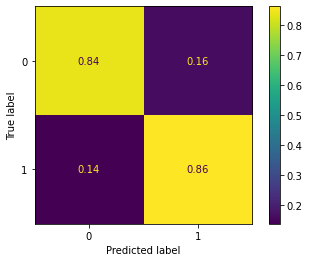

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, lr.predict(X_test), normalize='true')
ConfusionMatrixDisplay(confusion_matrix=cm).plot()